In [11]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20):
    """
    Cria um dataset bidimensional binário com
    rótulos igual 1 para todo exemplo que tiver
    o valor da primeira característica maior do
    que a da segunda, e -1 para os demais.
    """
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

Xtr, ytr = criaDatasetBidimensionalBinário()
Xtr, ytr

(array([[0.63364915, 0.59277833],
        [0.02719036, 0.49597933],
        [0.55863929, 0.51974257],
        [0.80598098, 0.94556125],
        [0.20929305, 0.74618992],
        [0.03615588, 0.29424707],
        [0.17322363, 0.34666444],
        [0.39700908, 0.65543507],
        [0.64106226, 0.68568098],
        [0.03398726, 0.62345517],
        [0.80133461, 0.82618509],
        [0.71294404, 0.61976491],
        [0.36495791, 0.38152399],
        [0.19492942, 0.46075355],
        [0.73481489, 0.2271936 ],
        [0.67068754, 0.44976182],
        [0.69052396, 0.1571586 ],
        [0.87712546, 0.48412478],
        [0.04581087, 0.03529208],
        [0.28135564, 0.47938457]]),
 array([ 1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
         1,  1, -1]))

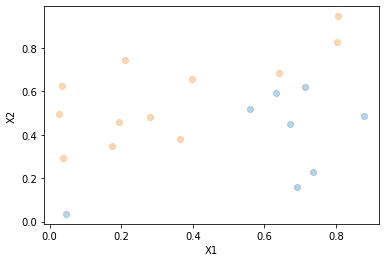

In [12]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

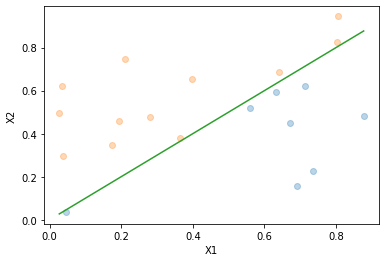

In [13]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

plotaHiperplanoDatasetBidimensional(Xtr, ytr, [1,-1])

In [14]:
def sign(a):
    return (a >= 0) * 2 - 1


In [15]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

1.0
[ 1.61224928 -1.58220534]


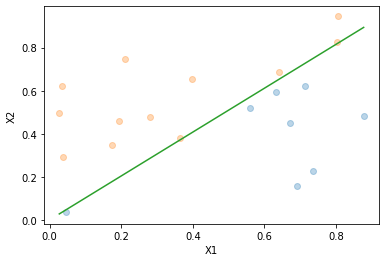

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Primeira versão do Perceptron treinado pelo
    Perceptron Learning Algorithm (PLA).
    """
    def __init__(self):
        self.w = None
        self.activation = sign

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        indexes = list(range(X.shape[0]))
        while True:
            any_error = False
            for i in sorted(indexes, key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                erro = y[i] - ypred
                if erro != 0:
                    any_error = True
                self.w += erro * x
            if not any_error:
                break

    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)

1.0
[ 3.09159067 -3.05070984]


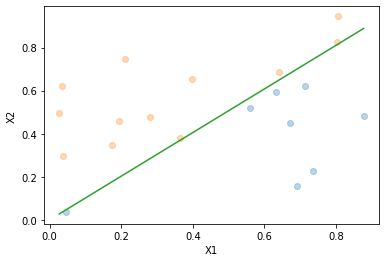

In [17]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado pelo Perceptron Learning Algorithm (PLA).
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = sign
        self.max_iter = max_iter

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        indexes = list(range(X.shape[0]))
        for _ in range(self.max_iter):
            any_error = False
            for i in sorted(indexes, key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                erro = y[i] - ypred
                if erro != 0:
                    any_error = True
                self.w += erro * x
            if not any_error:
                break

    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)

In [18]:
Xte, yte = criaDatasetBidimensionalBinário(1000)

0.998


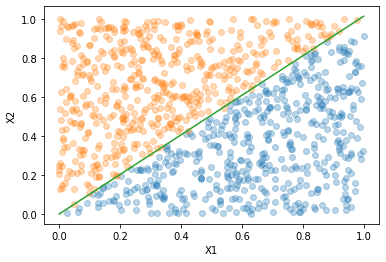

In [19]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)

1.0


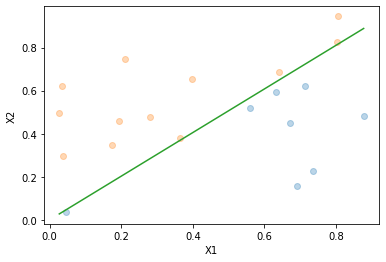

0.998


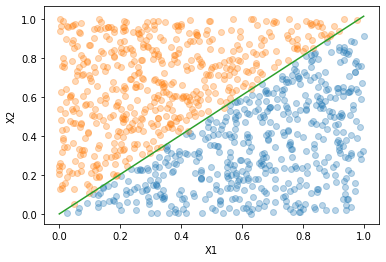

In [20]:
perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)